# 1. $\chi^{2}$ contingency table analysis

Chi Square is a widely used tool to check association and is explained here with very simple examples so that the concept is understood. Chi Square is used to check the effect of a factor on output and is also used to check goodness of fit of various distributions.

Important to note : Chi Square is used when both X and Y are discrete data types. Chi Square statistic should be estimated only on counts of data. If the data is in percentage form, they should be converted to counts or numbers. Another assumption is that the observations are drawn independently [(taken from SixSigmaStats.com)](https://sixsigmastats.com/chi-square-explained-with-examples/)


In [1]:
# My first chi-square 
# Make as many anotations as necessary
rm(list=ls())

# load the libraries
library(ggplot2)
library(dplyr)

# Get the data

# in R studio
# lady <- read.csv("file path/datasets-master/ladybirds_morph_colour.csv")

lady <- read.csv("datasets-master/ladybirds_morph_colour.csv")
glimpse(lady)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 20
Columns: 4
$ Habitat      <chr> "Rural", "Rural", "Rural", "Rural", "Rural", "Rural", "Ru…
$ Site         <chr> "R1", "R2", "R3", "R4", "R5", "R1", "R2", "R3", "R4", "R5…
$ morph_colour <chr> "black", "black", "black", "black", "black", "red", "red"…
$ number       <int> 10, 3, 4, 7, 6, 15, 18, 9, 12, 16, 32, 25, 25, 17, 16, 17…


## The ladybirds (Adalia bipunctata) data set
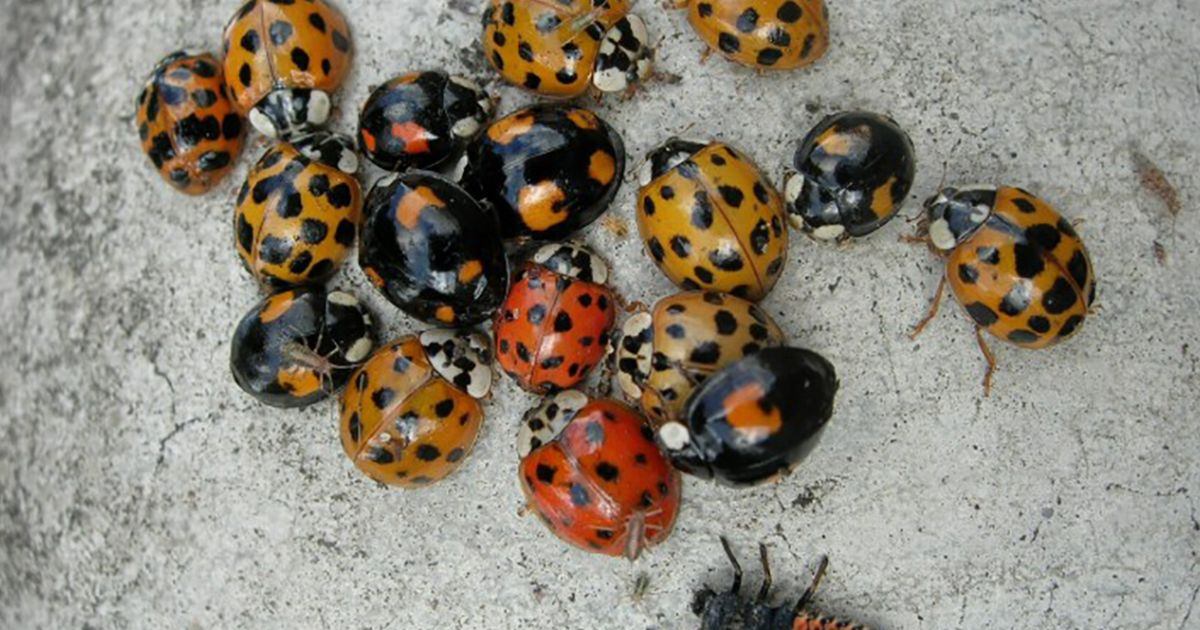

In [2]:
# pipe to sumarise and get the total number of ladybirds
totals <- lady %>%
    group_by(Habitat, morph_colour) %>%
        summarise(total.number = sum(number))
totals

`summarise()` regrouping output by 'Habitat' (override with `.groups` argument)



Habitat    morph_colour total.number
1 Industrial black        115         
2 Industrial red           85         
3 Rural      black         30         
4 Rural      red           70

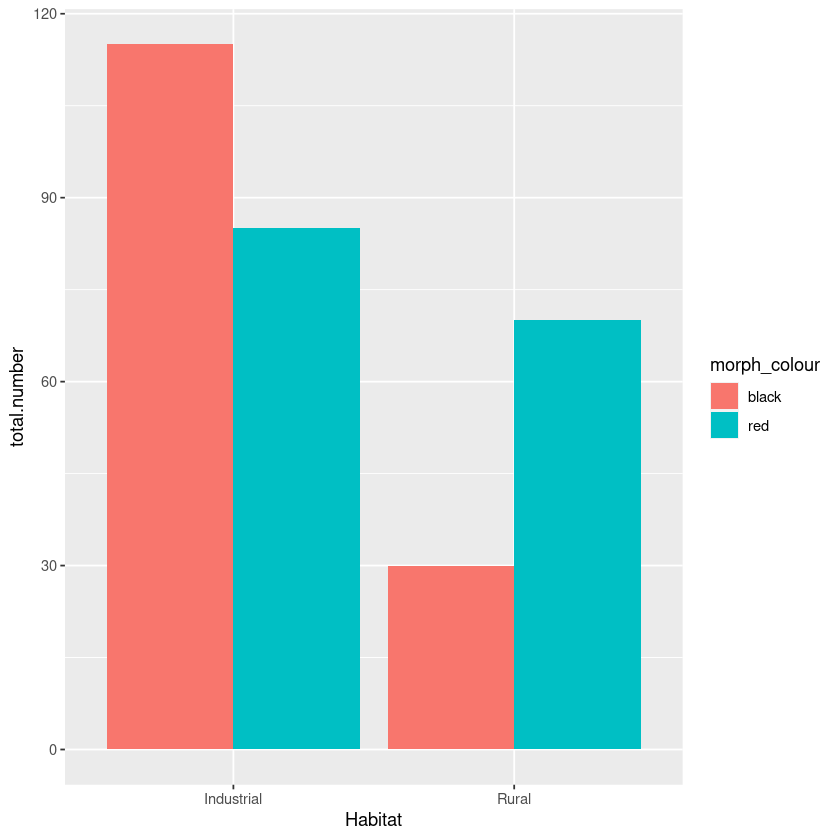

In [3]:
# plot the data

ggplot(totals, aes(x = Habitat, y =total.number, fill = morph_colour )) +
    geom_bar(stat="identity", position = 'dodge')

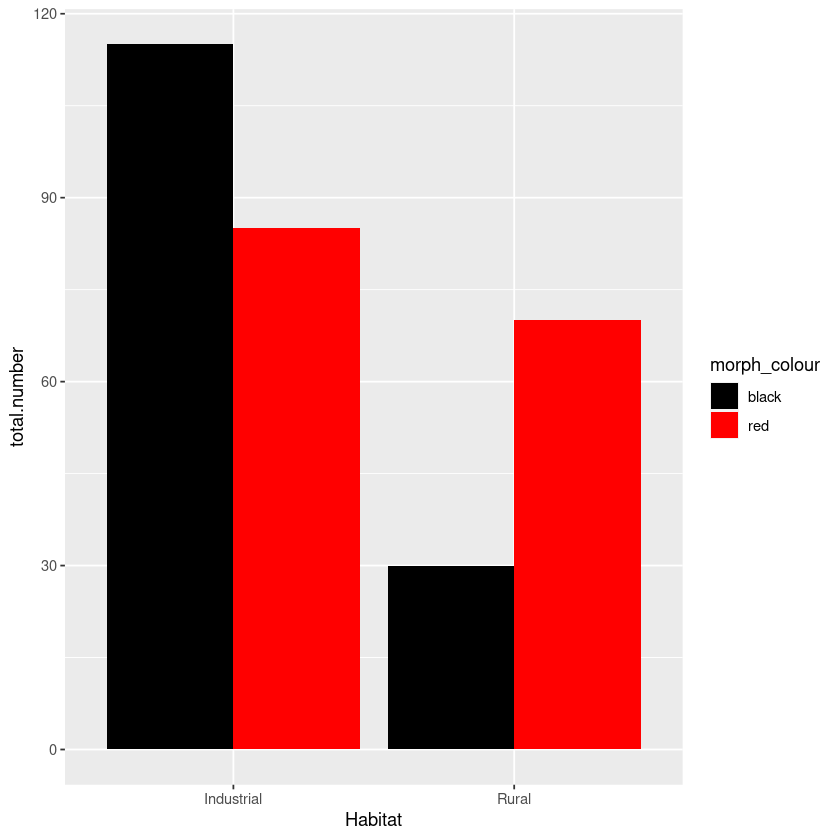

In [4]:
# plot the data

ggplot(totals, aes(x = Habitat, y =total.number, fill = morph_colour )) +
    geom_bar(stat="identity", position = 'dodge') + 
    scale_fill_manual(values = c(black ="black", red = "red"))

In [5]:
lady.mat <- xtabs(number~ Habitat + morph_colour, data = lady)
lady.mat

            morph_colour
Habitat      black red
  Industrial   115  85
  Rural         30  70

In [6]:
chisq.test(lady.mat)


	Pearson's Chi-squared test with Yates' continuity correction

data:  lady.mat
X-squared = 19.103, df = 1, p-value = 1.239e-05


In [7]:
test <- chisq.test(lady.mat)
names(test)

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"

In [8]:
test$expected

morph_colour
Habitat      black    red      
  Industrial 96.66667 103.33333
  Rural      48.33333  51.66667

# Two sample $t-test$ 

A two sample t-test is used to test whether or not the means of two populations are equal.
Two Sample t-test: Formula
A two-sample t-test always uses the following null hypothesis:

H0: μ1 = μ2 (the two population means are equal)
The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

    -H1 (two-tailed): μ1 ≠ μ2 (the two population means are not equal)
    -H1 (left-tailed): μ1 < μ2 (population 1 mean is less than population 2 mean)
    -H1 (right-tailed): μ1> μ2 (population 1 mean is greater than population 2 mean)


Rows: 20
Columns: 3
$ Ozone           <dbl> 61.7, 64.0, 72.4, 56.8, 52.4, 44.8, 70.4, 67.6, 68.8, …
$ Garden.location <chr> "West", "West", "West", "West", "West", "West", "West"…
$ Garden.ID       <chr> "G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", …


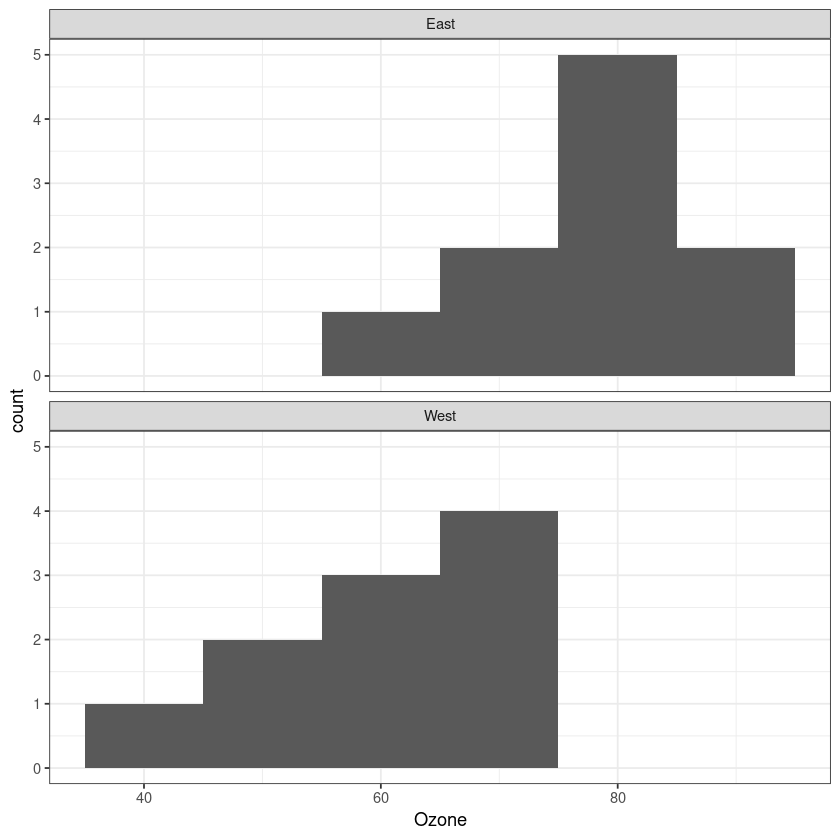

In [9]:
# Ozone data

ozone <- read.csv("datasets-master/ozone.csv")
glimpse(ozone)

ggplot(ozone, aes(x = Ozone)) + 
    geom_histogram(binwidth = 10) + 
    facet_wrap(~ Garden.location, ncol = 1) + 
    theme_bw()

In [10]:
# let's calculate some stats mean and sd 
summary <- ozone %>%
    group_by(Garden.location) %>%
        summarise(mean = mean(Ozone), sd=sd(Ozone))
summary


`summarise()` ungrouping output (override with `.groups` argument)



Garden.location mean  sd      
1 East            77.34 7.873048
2 West            61.26 9.060684

In [11]:
# two t-test

t.test(Ozone ~ Garden.location, data = ozone)


	Welch Two Sample t-test

data:  Ozone by Garden.location
t = 4.2363, df = 17.656, p-value = 0.0005159
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8.094171 24.065829
sample estimates:
mean in group East mean in group West 
             77.34              61.26 


In [12]:
# var test
var.test(Ozone ~ Garden.location, data = ozone)


	F test to compare two variances

data:  Ozone by Garden.location
F = 0.75503, num df = 9, denom df = 9, p-value = 0.6823
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1875386 3.0397437
sample estimates:
ratio of variances 
         0.7550293 


# Simple linear regression

In [13]:
plant_gr <- read.csv("datasets-master/plant.growth.rate.csv")
glimpse(plant_gr)

Rows: 50
Columns: 2
$ soil.moisture.content <dbl> 0.4696876, 0.5413106, 1.6979915, 0.8255799, 0.85…
$ plant.growth.rate     <dbl> 21.31695, 27.03072, 38.98937, 30.19529, 37.06547…


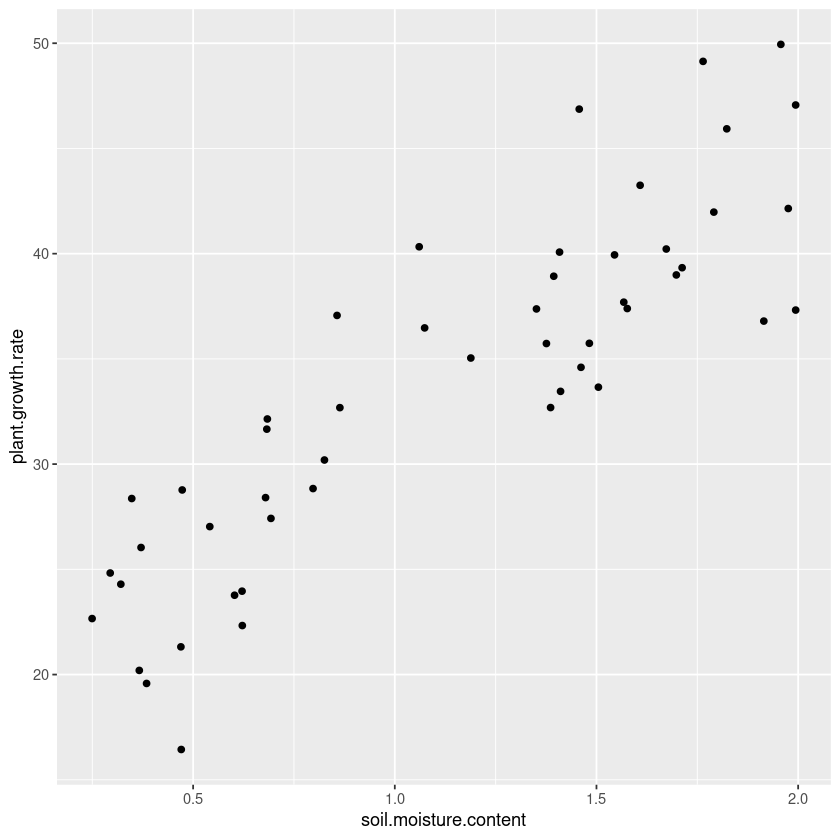

In [15]:
# Plot the data ( Plant growth vs soil moisture)

ggplot(plant_gr, aes(x= soil.moisture.content, y = plant.growth.rate)) + 
    geom_point()



In [16]:
# Model plant growth rate as a function of soil moisture 

model_pgr <- lm(plant.growth.rate ~ soil.moisture.content, data = plant_gr)
summary(model_pgr)

# What does it mean biologically?


Call:
lm(formula = plant.growth.rate ~ soil.moisture.content, data = plant_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9089 -3.0747  0.2261  2.6567  8.9406 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             19.348      1.283   15.08   <2e-16 ***
soil.moisture.content   12.750      1.021   12.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.019 on 48 degrees of freedom
Multiple R-squared:  0.7648,	Adjusted R-squared:  0.7599 
F-statistic: 156.1 on 1 and 48 DF,  p-value: < 2.2e-16


Installing package into ‘/home/ja-r/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“Removed 50 row(s) containing missing values (geom_path).”
Warning message:
“Removed 50 row(s) containing missing values (geom_path).”
Warning message:
“Removed 50 row(s) containing missing values (geom_path).”


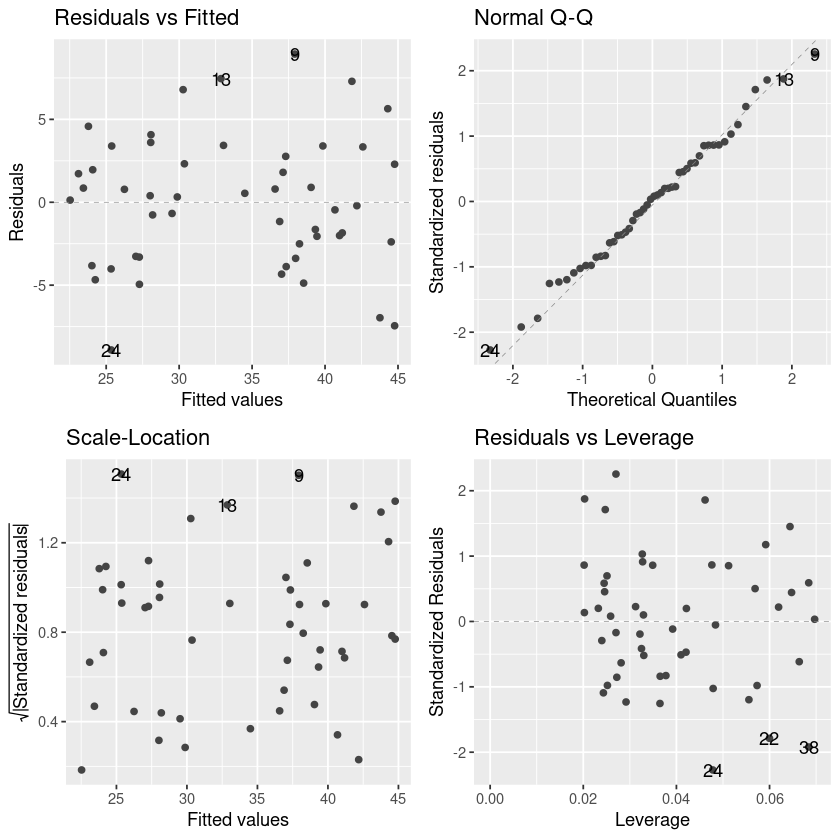

In [17]:
# model inspection
#install.packages("ggfortify")
library(ggfortify)
autoplot(model_pgr, smooth.colour = NA)

## Model interpretation

In [18]:
anova(model_pgr)

Df Sum Sq    Mean Sq    F value  Pr(>F)     
soil.moisture.content  1 2521.1497 2521.14972 156.0782 1.06985e-16
Residuals             48  775.3497   16.15312       NA          NA

In [19]:
summary(model_pgr)


Call:
lm(formula = plant.growth.rate ~ soil.moisture.content, data = plant_gr)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9089 -3.0747  0.2261  2.6567  8.9406 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             19.348      1.283   15.08   <2e-16 ***
soil.moisture.content   12.750      1.021   12.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.019 on 48 degrees of freedom
Multiple R-squared:  0.7648,	Adjusted R-squared:  0.7599 
F-statistic: 156.1 on 1 and 48 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



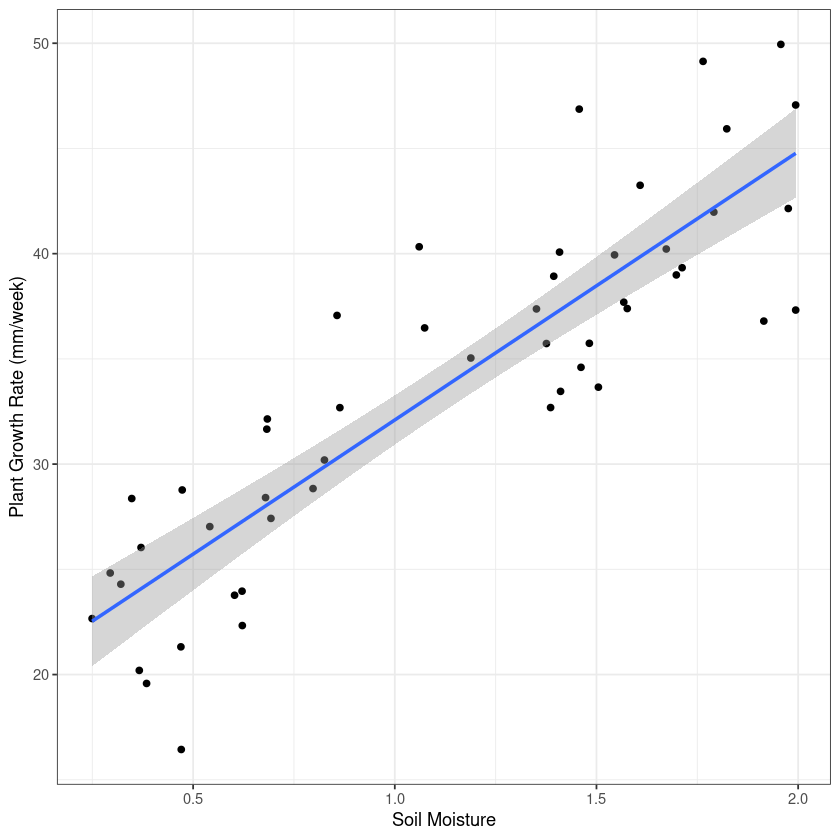

In [20]:
# Plot the regression line
ggplot(plant_gr, aes(x = soil.moisture.content, y = plant.growth.rate)) + 
    geom_point() + geom_smooth(method = 'lm') + 
    ylab("Plant Growth Rate (mm/week)") +
    xlab("Soil Moisture") + 
    theme_bw()

# One Way ANOVA

A one-way ANOVA (“analysis of variance”) compares the means of three or more independent groups to determine if there is a statistically significant difference between the corresponding population means [see more in STATOLOGY](https://www.statology.org/one-way-anova/).

## Working example

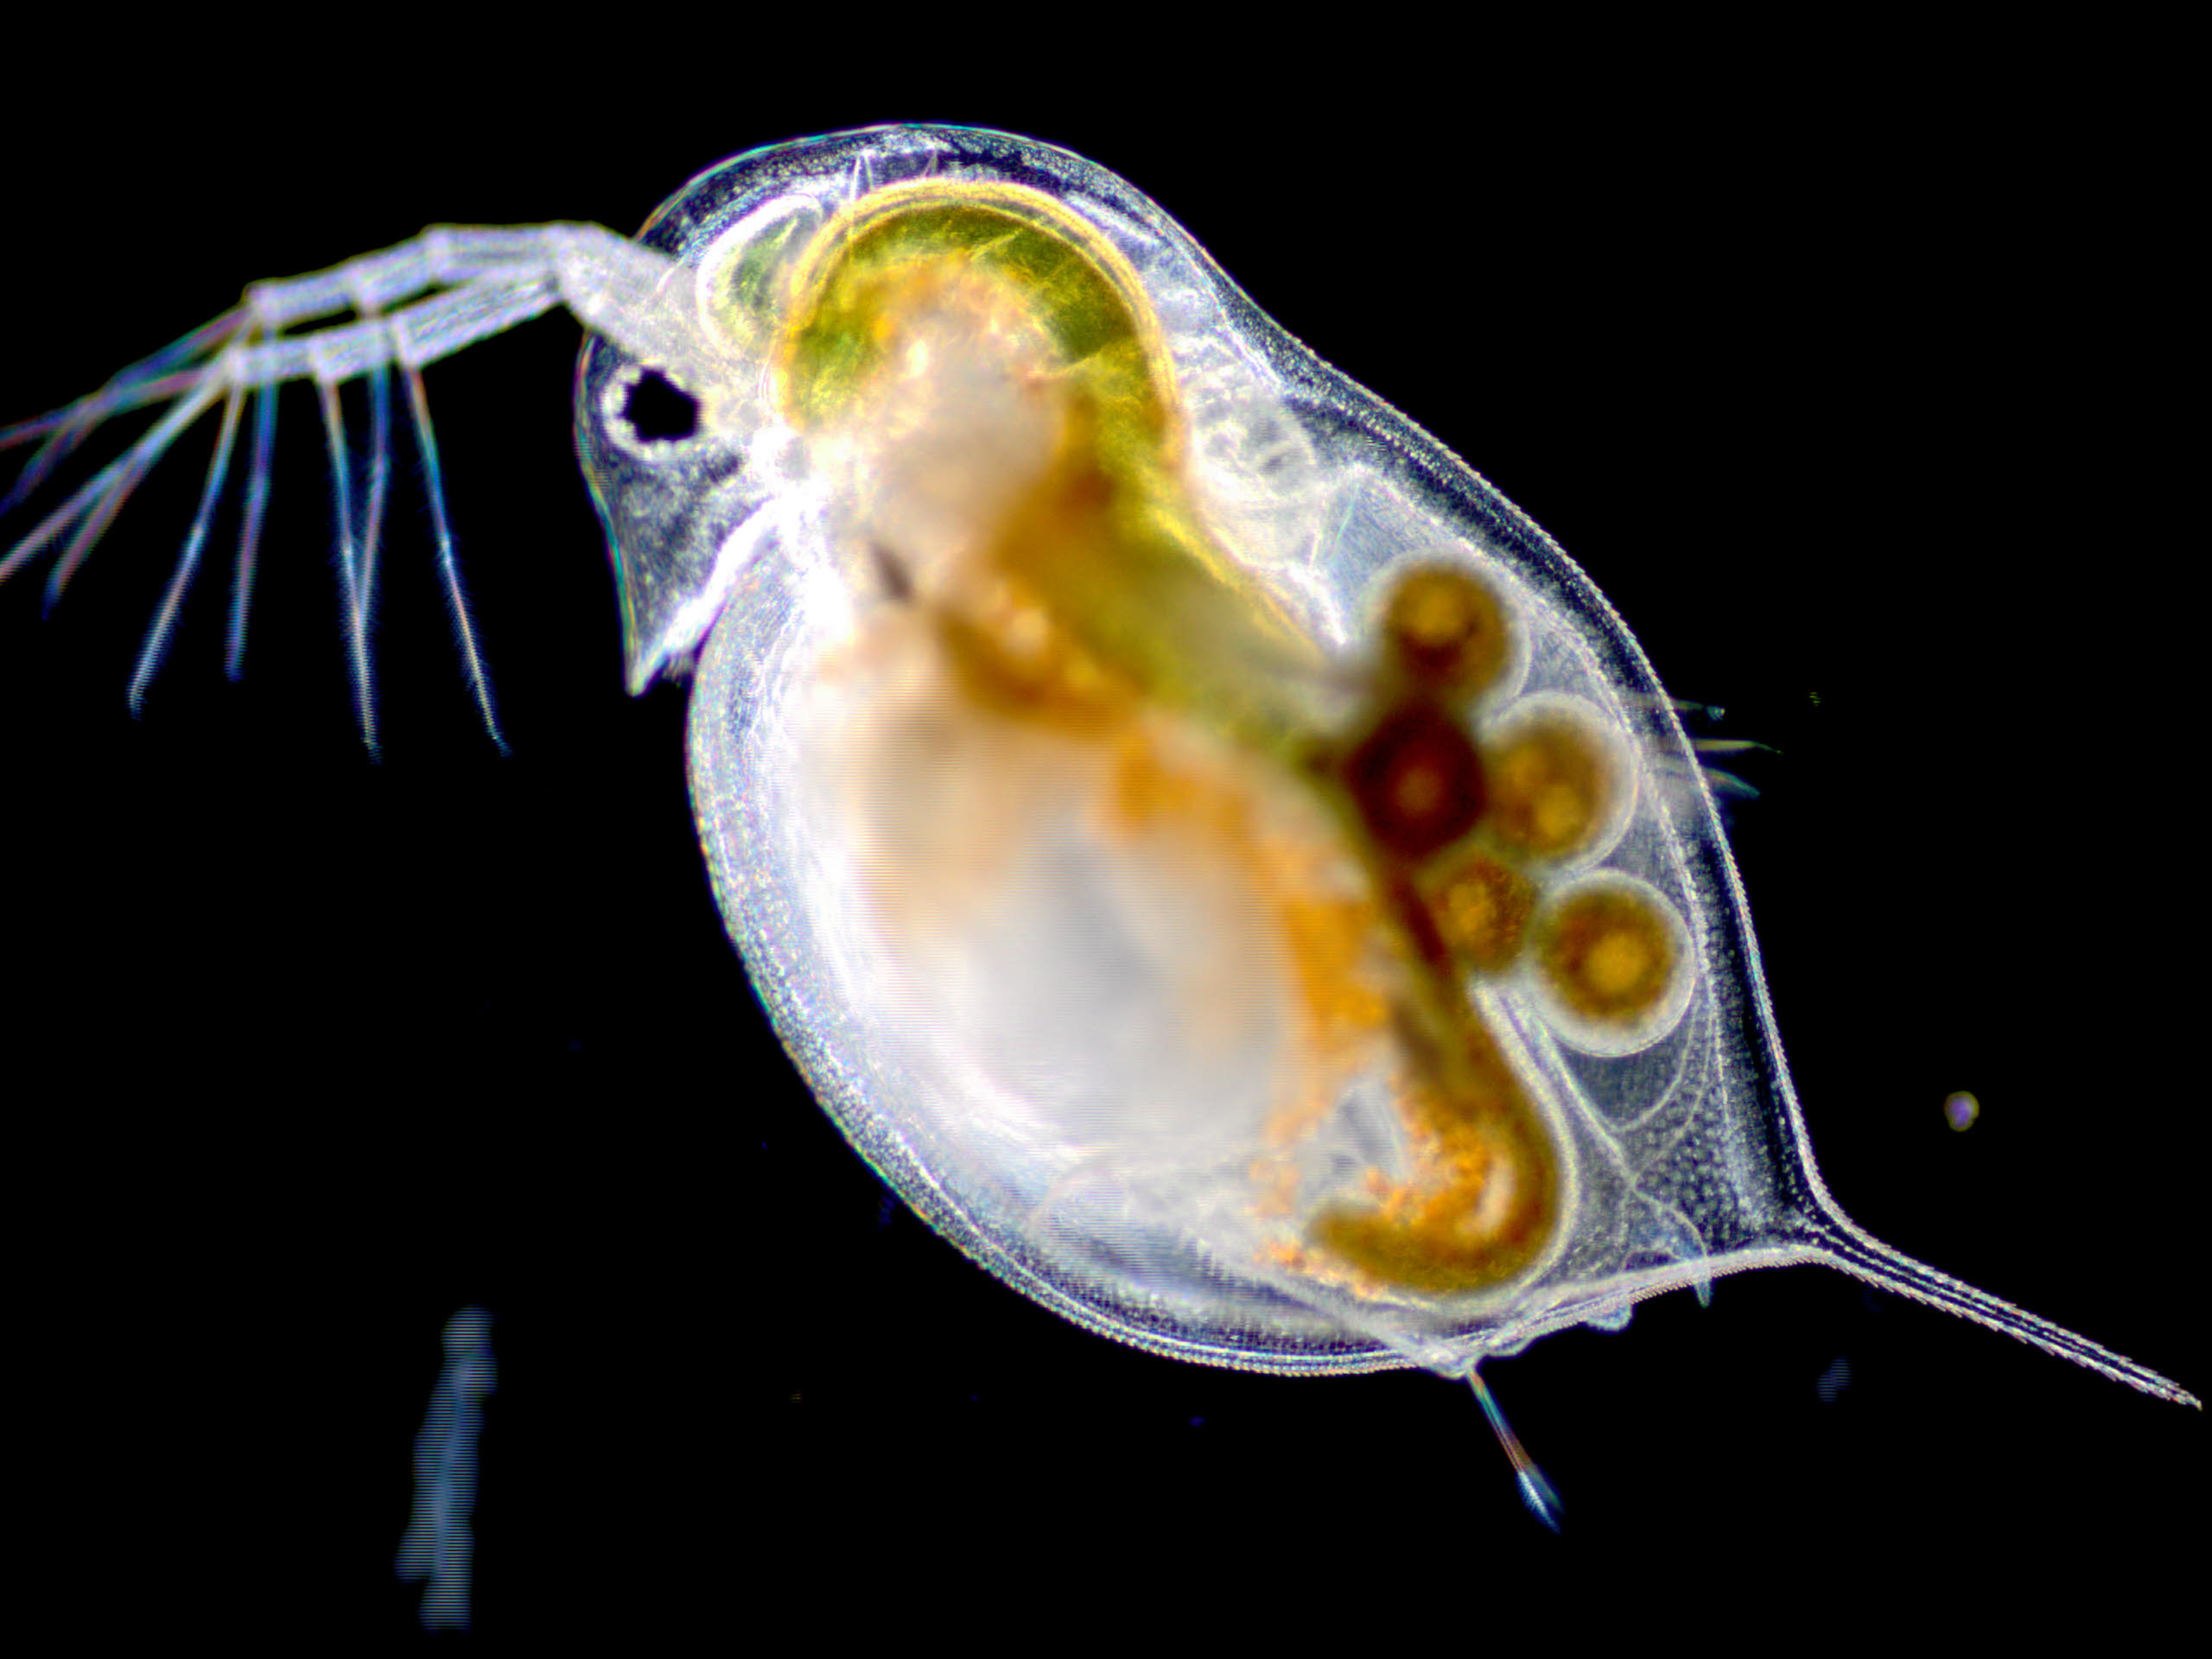

Rows: 40
Columns: 3
$ parasite    <chr> "control", "control", "control", "control", "control", "co…
$ rep         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, …
$ growth.rate <dbl> 1.0747092, 1.2659016, 1.3151563, 1.0757519, 1.1967619, 1.3…


[1] "control"                   "Metschnikowia bicuspidata"
[3] "Pansporella perplexa"      "Pasteuria ramosa"

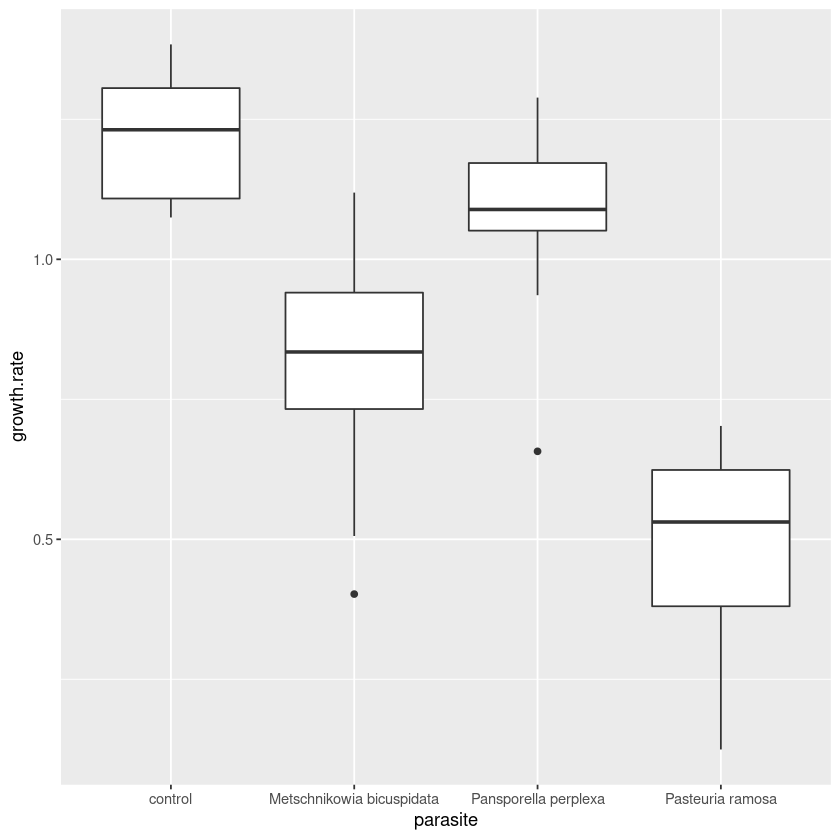

In [21]:
# waterflies data set

daphnia <- read.csv("datasets-master/Daphniagrowth.csv")
glimpse(daphnia)



# plot

ggplot(daphnia, aes(x= parasite, y= growth.rate)) + 
    geom_boxplot()

In [31]:
daphnia$parasite <- factor(daphnia$parasite)
levels(daphnia$parasite)

daphnia$Metschnikowia <- ifelse(daphnia$parasite == 'Metschnikowia bicuspidata', 1, 0 )
daphnia$Pansporella <- ifelse(daphnia$parasite == 'Pansporella perplexa', 1, 0 )
daphnia$Pasteuria <- ifelse(daphnia$parasite == 'Pasteuria ramosa', 1, 0 )
daphnia$control <- ifelse(daphnia$parasite == 'control', 1, 0 )
head(daphnia)


[1] "control"                   "Metschnikowia bicuspidata"
[3] "Pansporella perplexa"      "Pasteuria ramosa"

parasite rep growth.rate Metschnikowia Pansporella Pasteuria control
1 control  1   1.074709    0             0           0         1      
2 control  2   1.265902    0             0           0         1      
3 control  3   1.315156    0             0           0         1      
4 control  4   1.075752    0             0           0         1      
5 control  5   1.196762    0             0           0         1      
6 control  6   1.383795    0             0           0         1

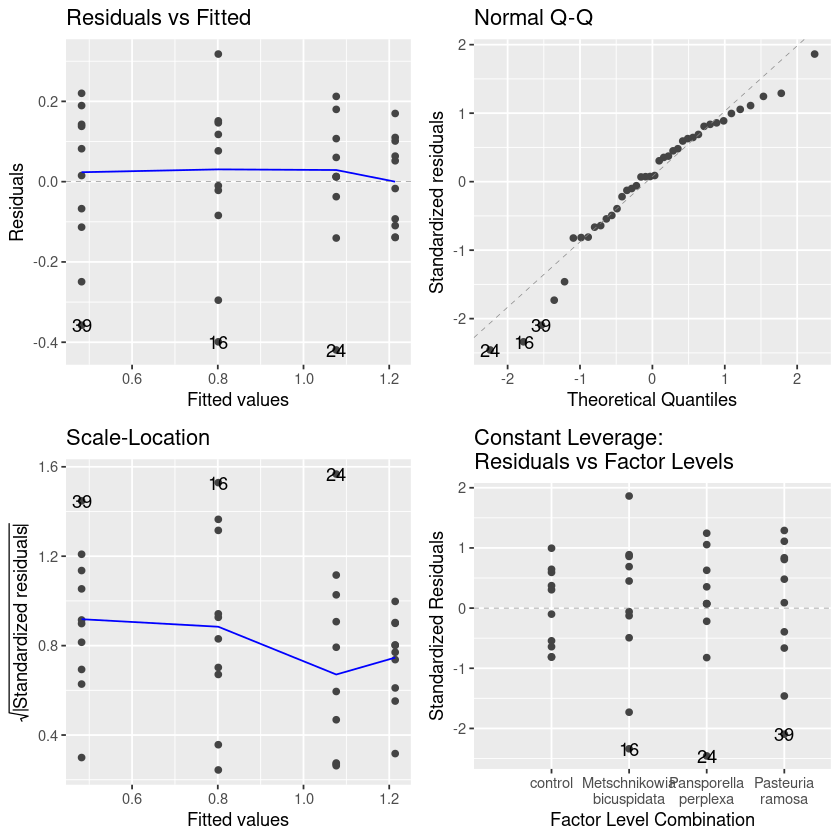

In [32]:
daph_mod <- lm(growth.rate ~ parasite, data = daphnia)

daph_mod2 <- lm(growth.rate ~ control + Pansporella + Pasteuria, data = daphnia)

autoplot(daph_mod)

In [24]:
# interpredation
anova(daph_mod)

Df Sum Sq   Mean Sq    F value  Pr(>F)      
parasite   3 3.137907 1.04596913 32.32522 2.571285e-10
Residuals 36 1.164876 0.03235768       NA           NA

In [26]:
model.matrix(~parasite, data = daphnia)

(Intercept) parasiteMetschnikowia bicuspidata parasitePansporella perplexa
1  1           0                                 0                           
2  1           0                                 0                           
3  1           0                                 0                           
4  1           0                                 0                           
5  1           0                                 0                           
6  1           0                                 0                           
7  1           0                                 0                           
8  1           0                                 0                           
9  1           0                                 0                           
10 1           0                                 0                           
11 1           1                                 0                           
12 1           1                                 0                           
13 1           1                                 0                           
14 1           1                                 0                           
15 1           1                                 0                           
16 1           1                                 0                           
17 1           1                                 0                           
18 1           1                                 0                           
19 1           1                                 0                           
20 1           1                                 0                           
21 1           0                                 1                           
22 1           0                                 1                           
23 1           0                                 1                           
24 1           0                                 1                           
25 1           0                                 1                           
26 1           0                                 1                           
27 1           0                                 1                           
28 1           0                                 1                           
29 1           0                                 1                           
30 1           0                                 1                           
31 1           0                                 0                           
32 1           0                                 0                           
33 1           0                                 0                           
34 1           0                                 0                           
35 1           0                                 0                           
36 1           0                                 0                           
37 1           0                                 0                           
38 1           0                                 0                           
39 1           0                                 0                           
40 1           0                                 0                           
   parasitePasteuria ramosa
1  0                       
2  0                       
3  0                       
4  0                       
5  0                       
6  0                       
7  0                       
8  0                       
9  0                       
10 0                       
11 0                       
12 0                       
13 0                       
14 0                       
15 0                       
16 0                       
17 0                       
18 0                       
19 0                       
20 0                       
21 0                       
22 0                       
23 0                       
24 0                       
25 0                       
26 0                       
27 0                       
28 0                 

In [25]:


summary(daph_mod)



Call:
lm(formula = growth.rate ~ parasite, data = daphnia)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41930 -0.09696  0.01408  0.12267  0.31790 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        1.21391    0.05688  21.340  < 2e-16 ***
parasiteMetschnikowia bicuspidata -0.41275    0.08045  -5.131 1.01e-05 ***
parasitePansporella perplexa      -0.13755    0.08045  -1.710   0.0959 .  
parasitePasteuria ramosa          -0.73171    0.08045  -9.096 7.34e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1799 on 36 degrees of freedom
Multiple R-squared:  0.7293,	Adjusted R-squared:  0.7067 
F-statistic: 32.33 on 3 and 36 DF,  p-value: 2.571e-10


In [36]:
((1.21391 + (-0.73171))/1.21391   ) * 100 

[1] 39.72288

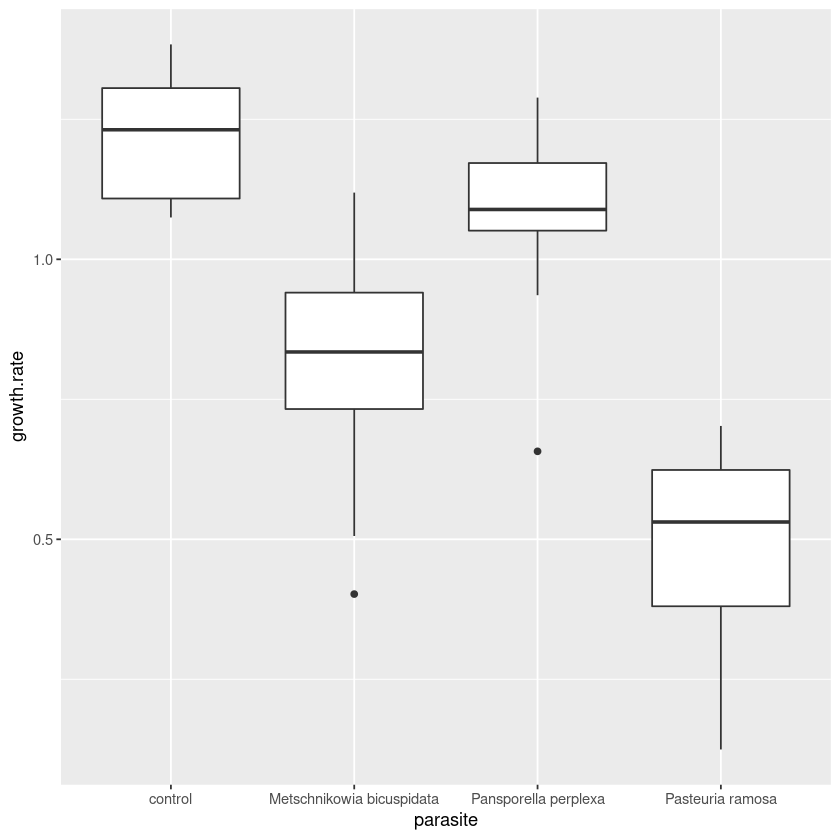

In [34]:
# plot

ggplot(daphnia, aes(x= parasite, y= growth.rate)) + 
    geom_boxplot()

In [33]:
#summary(daph_mod2)


Call:
lm(formula = growth.rate ~ control + Pansporella + Pasteuria, 
    data = daphnia)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41930 -0.09696  0.01408  0.12267  0.31790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.80115    0.05688  14.084 3.24e-16 ***
control      0.41275    0.08045   5.131 1.01e-05 ***
Pansporella  0.27520    0.08045   3.421 0.001568 ** 
Pasteuria   -0.31895    0.08045  -3.965 0.000334 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1799 on 36 degrees of freedom
Multiple R-squared:  0.7293,	Adjusted R-squared:  0.7067 
F-statistic: 32.33 on 3 and 36 DF,  p-value: 2.571e-10
